社团结构划分，使用CNM算法，导入真实数据集进行测试

In [48]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import igraph as ig

使用igraph构建网络的简单操作

In [4]:
g=ig.Graph()
g = ig.Graph(n=10, edges=[[0, 1], [0, 5]])
print(g)
ig.summary(g)

IGRAPH U--- 10 2 --
+ edges:
0--1 0--5
IGRAPH U--- 10 2 -- 


In [41]:
#加载真实网络数据集
data1=pd.read_table("./real-data/Wiki-Vote.txt",header=None)
data1.columns=['source','target']
G1=nx.from_pandas_edgelist(data1,'source','target',create_using=nx.DiGraph())
G1=nx.to_undirected(G1)
Matrix=nx.adjacency_matrix(G1)
Matrix=Matrix.todense()
G=ig.Graph.Adjacency(Matrix.tolist())
ig.summary(G)
G.to_undirected()
print(G.is_directed())

IGRAPH D--- 7117 201526 -- 
False


In [74]:
#generate a tuple to get the return value
community=G.community_fastgreedy()
print(community)
# Extract the clusters from the dendrogram at a specific level
level = 1  # Adjust the level according to your needs
n_clusters = int(level * community.optimal_count)  # Convert level to an integer
clusters = community.as_clustering(n_clusters)
# Print the modularity score for the optimal clustering
modularity_score = community.optimal_count
print(f"Modularity score for the optimal clustering: {modularity_score}")

# Print the community assignments
for i, cluster in enumerate(clusters):
    print(f"Community {i+1}: {cluster}")


Dendrogram, 7117 elements, 7092 merges
Modularity score for the optimal clustering: 51
Community 1: [0, 1]
Community 2: [2, 8, 9, 10, 11, 12, 13, 18, 19, 21, 23, 24, 25, 27, 28, 29, 30, 31, 33, 34, 37, 39, 40, 41, 42, 44, 47, 51, 53, 54, 55, 57, 59, 64, 66, 67, 68, 69, 70, 71, 72, 75, 76, 79, 82, 83, 85, 91, 95, 96, 104, 105, 106, 107, 108, 110, 111, 114, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 129, 131, 132, 133, 136, 137, 138, 140, 144, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 163, 164, 165, 167, 169, 171, 172, 173, 174, 175, 176, 178, 180, 182, 343, 344, 345, 346, 351, 353, 354, 355, 356, 359, 360, 361, 362, 363, 364, 367, 368, 371, 372, 392, 393, 408, 411, 412, 413, 428, 438, 781, 884, 893, 894, 896, 897, 902, 908, 911, 915, 916, 954, 956, 1049, 1090, 1094, 1095, 1096, 1097, 1115, 1116, 1124, 1134, 1135, 1136, 1169, 1171, 1172, 1193, 1194, 1195, 1196, 1210, 1234, 1235, 1236, 1240, 1241, 1243, 1244, 1245, 1246, 1247, 1274, 1285, 1317, 1325, 1326, 13

In [91]:
G=ig.Graph()
G=ig.Graph.Erdos_Renyi(4000,0.5)
community=G.community_fastgreedy()
print(community)


Dendrogram, 4000 elements, 3999 merges


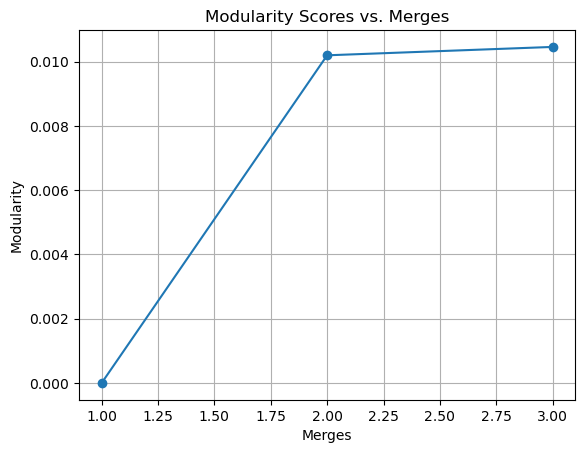

In [92]:
# Extract the clustering at each level and calculate the modularity score
modularity_scores = []
for level in range(community.optimal_count):
    clusters = community.as_clustering(level+1)
    modularity = clusters.modularity
    modularity_scores.append(modularity)

# Create a list of merges
merges = range(1, len(modularity_scores)+1)

# Plot the data
plt.plot(merges, modularity_scores, marker='o')
plt.xlabel('Merges')
plt.ylabel('Modularity')
plt.title('Modularity Scores vs. Merges')
plt.grid(True)
plt.show()